In [1]:
import sys
sys.path.append('..')

In [17]:
from therm import create_app
from therm.models import Sample, State
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd


app = create_app('Development')

[2019-03-13 22:38:12,938] WARNING in __init__: Loaded app with settings: Development


In [18]:
%matplotlib inline

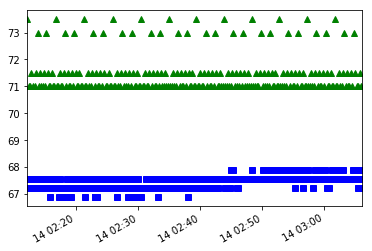

In [53]:
hours = .9
with app.app_context():
    samples_ts = Sample.timeseries(Sample.since(datetime.utcnow() - timedelta(hours=hours)))
    states_ts = State.timeseries(State.since(datetime.utcnow() - timedelta(hours=hours)))
    
# drop some states
states_ts = states_ts[::2]
states_ts[::7] += 2
states_ts[::3] += .5

samples_ts.plot(style="bs")
states_ts.plot(style="g^")

501
251
42


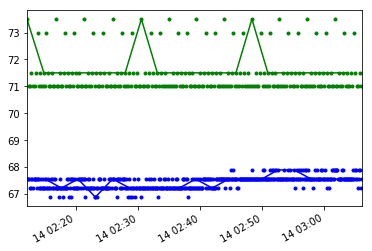

In [54]:
def jointerpolate(objs, datetime_index=None):
    """Join the indexes of multiple timeseries and interpolate onto the joined set of index points"""
    new_index = pd.concat(objs + [pd.Series(index=datetime_index)], axis=0).sort_index().index
    return (pd.concat([obj, pd.Series(index=new_index)], axis=0).interpolate(method='time') for obj in objs)

def quantize(ts, target_points=10, max_points=None):
    max_points = max_points or target_points * 2
    if len(ts) < max_points:
        return ts
    else:
        downsamp = int(len(ts) / max_points)
        return ts[::downsamp]
    
t_min = min(pd.concat([samples_ts, states_ts]))
t_max = max(pd.concat([samples_ts, states_ts]))
even_ts = 
oversamp_ts
i_samp, i_state = jointerpolate([samples_ts, states_ts])
print(len(samples_ts.index))
print(len(states_ts.index))
print(len(interp.index))
# i_samp.plot(style='b+')
#i_state.plot(style='g^')
samples_ts.plot(style="b.")
states_ts.plot(style="g.")
q_samp = quantize(samples_ts)
q_state = quantize(states_ts)
qi_samp = quantize(samples_ts)
qi_state = quantize(states_ts)
q_samp.plot(style='b-')
q_state.plot(style='g-')